# Neural & Behavioral Modeling - Week 3 (Exercises)

In [2]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *
from scipy.stats import pearsonr, zscore, ttest_ind
import time

## 1 Replicate exisiting findings/models (10 points)
Based on your personal interest, please choose and replicate ONE of the following studies:

1. <a href="http://ccl.northwestern.edu/netlogo/models/FlockingVeeFormations">Flocking Vee Formations</a> in NetLogo's [Sample Models::Biology] 

2. <a href="http://ccl.northwestern.edu/netlogo/models/WolfSheepPredation">Wolf-Sheep Predation</a> in NetLogo's [Sample Models::Biology] 

3. <a href="https://www.meetup.com/hkexperiment/events/226024232/">MIT Matching Game</a> or Kalick, S. M., & Hamilton, T. E. (1986). <a href="https://pdfs.semanticscholar.org/6533/189b1bc1040f59a728a75cc62e7bde401091.pdf">The matching hypothesis reexamined</a>. Journal of Personality and Social Psychology, 51(4), 673.

4. Gray, K., Rand, D. G., Ert, E., Lewis, K., Hershman, S., & Norton, M. I. (2014). <a href="http://www.mpmlab.org/groups/">The emergence of “us and them” in 80 lines of code: Modeling group genesis in homogeneous populations</a>. Psychological Science, 25(4), 982-990.

5. Luhmann, C. C., & Rajaram, S. (2015). <a href="http://journals.sagepub.com/doi/abs/10.1177/0956797615605798">Memory transmission in small groups and large networks: An agent-based model</a>. Psychological Science, 26(12), 1909-1917.

The paper I decide to replicate:

4. Gray, K., Rand, D. G., Ert, E., Lewis, K., Hershman, S., & Norton, M. I. (2014). <a href="http://www.mpmlab.org/groups/">The emergence of “us and them” in 80 lines of code: Modeling group genesis in homogeneous populations</a>. Psychological Science, 25(4), 982-990.

## 1.1 Interacting Agent model

### Function: interact (without trust)

 #### Input: 
 the interacting two people (p1,p2) <br>
 #### Model Parameters: 
 (reciprocity,transistivity)<br>
 #### Output: 
 (Clossness_matrix, Payoff) updated<br>



In [3]:
def interact(p1,p2,reciprocity,transistivity,Clossness_matrix, Payoff):
    prob   = [random.random() for i in range(2)]
    #print(str(p1)+str(p2))
    #print(prob)
    # play the prison dilema
    result = [-1,-1]
    for i in range(len(prob)):
        if prob[i] < Clossness_matrix[p1][p2]:
            result[i] = 1
        #else:
            #pass
    # Calculate and record the playoff
    if   sum(result) == 2: # colloborative
        #print('Colaborate!')
        Payoff[p1].append(1)
        Payoff[p2].append(1)
        Clossness_matrix[p1][p2] = 1-(1-Clossness_matrix[p1][p2])/reciprocity # reciprocity
        Clossness_matrix[p2][p1] = Clossness_matrix[p1][p2]
        # transistivity
        for i in range(len(Clossness_matrix)):
            #print(i)
            if i not in [p1,p2]:
                if abs(Clossness_matrix[p1][i]-0.5) > abs(Clossness_matrix[p2][i]-0.5): 
                    if Clossness_matrix[p1][i] > 0.5:
                        Clossness_matrix[p2][i] = 1-(1-Clossness_matrix[p2][i])/transistivity
                        Clossness_matrix[i][p2] = Clossness_matrix[p2][i]
                    elif Clossness_matrix[p1][i] < 0.5: 
                        Clossness_matrix[p2][i] = Clossness_matrix[p2][i]/transistivity
                        Clossness_matrix[i][p2] = Clossness_matrix[p2][i]
                    else:
                        pass
                        
                elif abs(Clossness_matrix[p2][i]-0.5) > abs(Clossness_matrix[p1][i]-0.5):  
                    
                    if Clossness_matrix[p2][i] > 0.5:
                        Clossness_matrix[p1][i] = 1-(1-Clossness_matrix[p1][i])/transistivity
                        Clossness_matrix[i][p1] = Clossness_matrix[p1][i]
                    elif Clossness_matrix[p2][i] < 0.5: 
                        Clossness_matrix[p1][i] = Clossness_matrix[p1][i]/transistivity
                        Clossness_matrix[i][p1] = Clossness_matrix[p1][i]
                    else:
                        pass
                else:
                    pass
            else:
                pass

        
    elif sum(result) == -2:
        #print('Defeat!')
        Payoff[p1].append(-1)
        Payoff[p2].append(-1)
        Clossness_matrix[p1][p2] = Clossness_matrix[p1][p2]/reciprocity
        Clossness_matrix[p2][p1] = Clossness_matrix[p1][p2]
        
    elif result[0] == 1 and result[1] == -1:
        #print('Nothing!')
        Payoff[p1].append(3)
        Payoff[p2].append(-3)
    else:
        #print('Nothing!')
        Payoff[p1].append(-3)
        Payoff[p2].append(3)
    
    # Update others playoff = 0 in this round
    
    for i in range(len(Clossness_matrix)):
        if i not in [p1,p2]:
            Payoff[i].append(0)
    #print(result)
    #Clossness_matrix = symm(Clossness_matrix)
    #print(Clossness_matrix)


### Function: clustering coefficient

 #### Input: 
 closeness_matrix <br>

 #### Output: 
 clustering_coefficient<br><br>


Reference: see the Opsahl, T., & Panzarasa, P. (2009). <a href="https://pdfs.semanticscholar.org/6209/2baa5625985f85667c3d4a0bd8d2f8e9f736.pdf">Clustering in weighted networks.</a> Social Networks, 31, 155–163. 

In [4]:
def Clustering_coefficient(cmatrix_ori):
    cmatrix=  cmatrix_ori.copy()
    cmatrix = cmatrix + (random.random((len(cmatrix_ori), len(cmatrix_ori)))-0.5)/1000
    fill_diagonal(cmatrix,0)
    cmatrix = around(cmatrix)
    n = trace(linalg.matrix_power(cmatrix,3))
    d = linalg.matrix_power(cmatrix,2).sum()- trace(linalg.matrix_power(cmatrix,2))
    #print(d)
    if d ==0:
        c_eff = 0
    else:
        c_eff = n/d
    return c_eff

#### Test the Group-forming Model: clustering through time 
reciprocity = 3, transistivity = 2, N = 40, round_number = 10000, iterations = 1

Time taken:  4.754205703735352 seconds.


Text(0,0.5,'Clustering Coefficient')

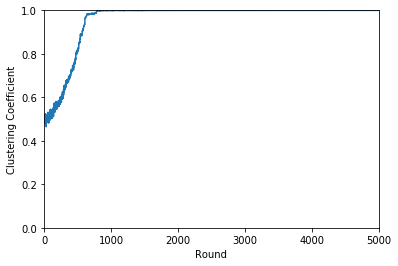

In [4]:
# Model parameters:
reciprocity   = 3
transistivity = 2

# How many people & rounds?
sz = 40
rounds_number = 10000
# Intialization
C_sum = []

# Drawing List
Drawing_list = arange(sz)
start = time.time()

# Starting rounds
for count in range(1):
    #print(count)
    C_eff = []
    Clossness_matrix = zeros((sz,sz))+0.5
    fill_diagonal(Clossness_matrix,0)
    Payoff = [[] for i in range(sz)]
    rounds=0
    #print(Clossness_matrix)
    #print(Payoff)
    #print(rounds)
    
    while(rounds<rounds_number):
        #print(Drawing_list)
        person1 = random.choice(Drawing_list)
        person2 = random.choice(delete(Drawing_list,person1))
        #person1 = random.choice(Drawing_list)
        #person2 = random.choice(Drawing_list[0:-2])
        
        if person2 == person1:
            person2+=1
        
        
        if random.random() < Clossness_matrix[person1][person2]:
            #print(Clossness_matrix)
            interact(person1, person2,reciprocity,transistivity,Clossness_matrix,Payoff)
            rounds+=1
            #print("Rounds "+str(rounds))
            #print(Clossness_matrix)
            C_eff.append(Clustering_coefficient(Clossness_matrix))
                #if rounds % 100 == 0:
                    #print(rounds)
        else:
            #print(Clossness_matrix)
            rounds+=1
            C_eff.append(Clustering_coefficient(Clossness_matrix))
    C_sum.append(C_eff)
    #print(Clossness_matrix)
    #print(Payoff)
    #print(rounds)
            
end = time.time()
elapsed = end - start
print ("Time taken: ", elapsed, "seconds.")
#plot(range(rounds_number),C_eff)
xlim(0,5000)
ylim(0,1)
k=[]
for j in range(rounds_number):
    k.append(mean([C_sum[i][j] for i in range(len(C_sum))])) 
#print(k)
plot(range(1,rounds_number+1),k)
xlabel("Round")
ylabel("Clustering Coefficient")

### Function: subgroups for calculating group number and size

 #### Input: 
 closeness_matrix <br>

 #### Output: 
 a list summary all the subgroups


In [5]:
def Group_size(cmatrix_ori):
    cmatrix = cmatrix_ori.copy()
    cmatrix = around(cmatrix)
    group=[]
    all_people=list(range(len(cmatrix)))
    for i in range(len(cmatrix)):
        if i in all_people:
            #print(i)
            subgroup = []
            subgroup.append(i)
            for j in range(i,len(cmatrix)):
                if cmatrix[i][j] !=0:
                    subgroup.append(j)
            if len(subgroup)!=0:
                if len(all_people) == len(subgroup):
                    group.append(subgroup)
                    all_people=[]
                    break
                else:
                    for i in subgroup:
                        all_people.remove(i)
           
                
                       
            #print(subgroup)
            group.append(subgroup)
            #print(all_people)
            
            
    return group
    
    

### Replication of Fig.1 - Visulization:

Use PCA to analysis clossess_matrix, visualize the two major components (z-score standardized)

In [6]:
from sklearn import decomposition
def visulization(cmatrix_ori, r):
    cmatrix=  cmatrix_ori.copy()
    cmatrix = cmatrix + (random.random((len(cmatrix_ori), len(cmatrix_ori)))-0.5)/1000
    fill_diagonal(cmatrix,0)
    Y = cmatrix.copy()
    pca = decomposition.PCA(n_components=2)
    pca.fit(Y)
    Y = pca.transform(Y)
    clf() # clear previous figure
    plot(zscore(Y[:,0]),zscore(Y[:,1]),'o')
    title("Rounds: "+ str(r))
    display(gcf()); clear_output(wait=True) # to allow dynamic plots

#### Visualize the Group-forming Model: clustering through time 
reciprocity = 3, transistivity = 2, N = 40, round_number = 10000, iterations = 1

Time taken:  16.842395544052124 seconds.
Group_number: 5
[[0, 16, 18, 36], [1, 2, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 19, 22, 23, 24, 26, 27, 28, 29, 30, 32, 33, 34, 35, 37, 38, 39], [3, 17, 20, 21, 31], [4, 9], [25]]


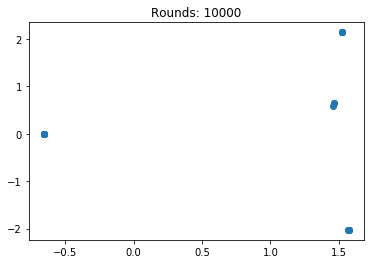

In [7]:
# Model parameters:
reciprocity   = 3
transistivity = 2

# How many people & rounds?
sz = 40
rounds_number = 10000
# Intialization
C_sum = []

# Drawing List
Drawing_list = arange(sz)
start = time.time()

# Starting rounds
for count in range(1):
    #print(count)
    C_eff = []
    Clossness_matrix = zeros((sz,sz))+0.5
    fill_diagonal(Clossness_matrix,0)
    Payoff = [[] for i in range(sz)]
    rounds=0
    #print(Clossness_matrix)
    #print(Payoff)
    #print(rounds)
    
    while(rounds<rounds_number):
        #print(Drawing_list)
        person1 = random.choice(Drawing_list)
        person2 = random.choice(delete(Drawing_list,person1))
        #person1 = random.choice(Drawing_list)
        #person2 = random.choice(Drawing_list[0:-2])
        
        if person2 == person1:
            person2+=1
        
        
        if random.random() < Clossness_matrix[person1][person2]:
            #print(Clossness_matrix)
            interact(person1, person2,reciprocity,transistivity,Clossness_matrix,Payoff)
            rounds+=1
            #print("Rounds "+str(rounds))
            #print(Clossness_matrix)
            C_eff.append(Clustering_coefficient(Clossness_matrix))
                #if rounds % 100 == 0:
                    #print(rounds)
        else:
            #print(Clossness_matrix)
            rounds+=1
            C_eff.append(Clustering_coefficient(Clossness_matrix))
            
        if rounds % 100 ==0:
            visulization(Clossness_matrix, rounds)
            
        
    C_sum.append(C_eff)
    #print(Clossness_matrix)
    #print(Payoff)
    #print(rounds)
            
end = time.time()
elapsed = end - start
print ("Time taken: ", elapsed, "seconds.")
#plot(range(rounds_number),C_eff)
#xlim(0,5000)
#ylim(0,1)
#k=[]
#for j in range(rounds_number):
#    k.append(mean([C_sum[i][j] for i in range(len(C_sum))])) 
#print(k)
#plot(range(1,rounds_number+1),k)
#xlabel("Round")
#ylabel("Clustering Coefficient")
print('Group_number: ' +str(len(Group_size(Clossness_matrix))))
print(Group_size(Clossness_matrix))

Note that the visualization does not imply the real numbers of group:
It looks like 4 groups in the plot, but 5 groups according to the cluster analysis.

## 1.2 Robust group formation


From N = 10 to 100, Is the group formation robust? 



### Wrap up the similuation into a function 

In [7]:
def Group_form(rc, trans, N_people, r_num, ger_times):
    reciprocity   = rc
    transistivity = trans

    # How many people & rounds?
    sz = N_people
    rounds_number = r_num
    # Intialization
    C_sum = []
    #G_sum = []

    # Drawing List
    Drawing_list = arange(sz)
    start = time.time()

    # Starting rounds
    for count in range(ger_times):
        #print(count)
        C_eff = []
        Clossness_matrix = zeros((sz,sz))+0.5
        fill_diagonal(Clossness_matrix,0)
        Payoff = [[] for i in range(sz)]
        rounds=0
        #print(Clossness_matrix)
        #print(Payoff)
        #print(rounds)

        while(rounds<rounds_number):
            #print(Drawing_list)
            person1 = random.choice(Drawing_list)
            person2 = random.choice(delete(Drawing_list,person1))
            #person1 = random.choice(Drawing_list)
            #person2 = random.choice(Drawing_list[0:-2])

            if person2 == person1:
                person2+=1


            if random.random() < Clossness_matrix[person1][person2]:
                #print(Clossness_matrix)
                interact(person1, person2,reciprocity,transistivity,Clossness_matrix, Payoff)
                rounds+=1
                #print("Rounds "+str(rounds))
                #print(Clossness_matrix)
                C_eff.append(Clustering_coefficient(Clossness_matrix))
                    #if rounds % 100 == 0:
                        #print(rounds)
            else:
                #print(Clossness_matrix)
                rounds+=1
                C_eff.append(Clustering_coefficient(Clossness_matrix))
        C_sum.append(C_eff)
        #G_sum.append(Group_size(Clossness_matrix))


    end = time.time()
    elapsed = end - start
    print ("Time taken: ", elapsed, "seconds.")
    #plot(range(rounds_number),C_eff)
    xlim(0,5000)
    ylim(0,1)
    k=[]
    for j in range(rounds_number):
        k.append(mean([C_sum[i][j] for i in range(len(C_sum))])) 
    #print(k)
    plot(range(1,rounds_number+1),k)
    xlabel("Round")
    ylabel("Clustering Coefficient")
    #print(around(Clossness_matrix))
    #summary = Group_size(Clossness_matrix)
    #print(G_sum)
    
    #return G_sum
    


### Replication of Fig. 3
reciprocity = 3, transistivity = 2, N = 10, 25, 40, 55, 70, 85, 100 <br>
round_number = 10000, iterations = 10 (in the original paper, they use 100,000)


Time taken:  17.777568578720093 seconds.
Time taken:  26.273017644882202 seconds.
Time taken:  39.23859119415283 seconds.
Time taken:  64.83549737930298 seconds.
Time taken:  104.24084043502808 seconds.
Time taken:  171.50564622879028 seconds.
Time taken:  181.13739466667175 seconds.


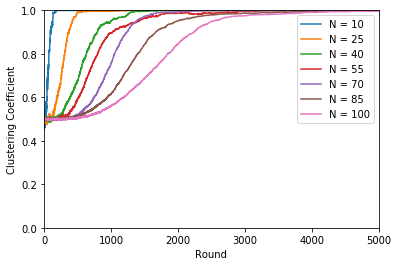

In [9]:
N = [10, 25, 40, 55, 70, 85, 100]
for n in N:
    Group_form(3,2,n,10000,10)
    #group_size = n/group_num
legend(['N = '+ str(n) for n in N])
#print(group_num)
#print(group_size)

## 1.3 How reciprocity and transistivity affect group number and size ?

#### Wrap up the similuation customed to group-number-and-size calculations into a function 

In [8]:
def Group_form_size(rc, trans, N_people, r_num, ger_times):
    reciprocity   = rc
    transistivity = trans

    # How many people & rounds?
    sz = N_people
    rounds_number = r_num
    # Intialization
    #C_sum = []
    G_sum = []
    P_sum = []
    # Drawing List
    Drawing_list = arange(sz)
    start = time.time()

    # Starting rounds
    for count in range(ger_times):
        #print(count)
        #C_eff = []
        Clossness_matrix = zeros((sz,sz))+0.5
        fill_diagonal(Clossness_matrix,0)
        Payoff = [[] for i in range(sz)]
        rounds=0
        #print(Clossness_matrix)
        #print(Payoff)
        #print(rounds)

        while(rounds<rounds_number):
            #print(Drawing_list)
            person1 = random.choice(Drawing_list)
            person2 = random.choice(delete(Drawing_list,person1))
            #person1 = random.choice(Drawing_list)
            #person2 = random.choice(Drawing_list[0:-2])

            if person2 == person1:
                person2+=1


            if random.random() < Clossness_matrix[person1][person2]:
                #print(Clossness_matrix)
                interact(person1, person2,reciprocity,transistivity,Clossness_matrix, Payoff)
                rounds+=1
                #print("Rounds "+str(rounds))
                #print(Clossness_matrix)
                #C_eff.append(Clustering_coefficient(Clossness_matrix))
                    #if rounds % 100 == 0:
                        #print(rounds)
            else:
                #print(Clossness_matrix)
                rounds+=1
                #C_eff.append(Clustering_coefficient(Clossness_matrix))
        #C_sum.append(C_eff)
        G_sum.append(len(Group_size(Clossness_matrix)))
        P_sum.append(len(Clossness_matrix)/len(Group_size(Clossness_matrix)))


    end = time.time()
    elapsed = end - start
    print ("Time taken: ", elapsed, "seconds.")
    #plot(range(rounds_number),C_eff)
    #xlim(0,5000)
    #ylim(0,1)
    #k=[]
    #for j in range(rounds_number):
    #    k.append(mean([C_sum[i][j] for i in range(len(C_sum))])) 
    #print(k)
    #plot(range(rounds_number),k)
    #print(around(Clossness_matrix))
    #summary = Group_size(Clossness_matrix)
    #print(G_sum)
    average_group_num =  mean(G_sum)
    average_group_size = mean(P_sum)
    #print(G_sum)
    #print(P_sum)
    return average_group_num, average_group_size  # 每一次generation的分組結果[[A],[B],[C]], 
    


### Replication of Fig. 4

N = 50, round_number = 10000<br>
low_value = 2, high_value = 8 <br>
fixed value = 5 <br>
iterations = 80 (higher than 10 to gain more statistical power)

In [19]:
R = [5]
T = [5]
exam_times = 80
for r in R: 
    #print('r = '+str(r))
    group_num_t_low,  group_size_t_low  = Group_form_size(r,2,50,10000,exam_times)
    group_num_t_high, group_size_t_high = Group_form_size(r,10,50,10000,exam_times)

for t in T:
    #print('t = '+str(t))
    group_num_r_low,  group_size_r_low  = Group_form_size(2,t,50,10000,exam_times)
    group_num_r_high, group_size_r_high =Group_form_size(10,t,50,10000,exam_times)




Time taken:  189.73156452178955 seconds.
Time taken:  122.84486865997314 seconds.
Time taken:  154.7296495437622 seconds.
Time taken:  181.26925659179688 seconds.


### Number of Groups

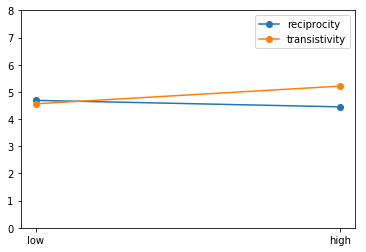

In [22]:
z = ['low','high']


plot(z, [group_num_r_low,group_num_r_high],'-o')
plot(z, [group_num_t_low,group_num_t_high],'-o')
ylim(0,8)
legend(['reciprocity', 'transistivity'])

### Group size

(0, 14)

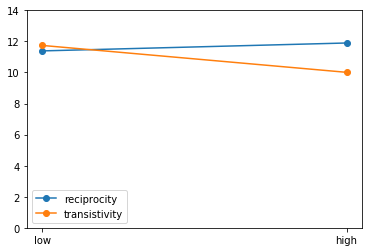

In [23]:
z = ['low','high']
plot(z, [group_size_r_low,group_size_r_high],'-o')
plot(z, [group_size_t_low,group_size_t_high],'-o')
legend(['reciprocity', 'transistivity'])
ylim(0,14)

## 1.4 How number of players affect group number and size ?

### Replication of Fig. 5
reciprocity = 3, transistivity = 2, N = 50, 
round_number = 30000,(more rounds to gurantee stablization) 
iterations = 30


[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
N=10
Time taken:  75.41237020492554 seconds.
N=15
Time taken:  93.2047951221466 seconds.
N=20
Time taken:  94.57990193367004 seconds.
N=25
Time taken:  105.3337914943695 seconds.
N=30
Time taken:  141.55510115623474 seconds.
N=35
Time taken:  144.84519267082214 seconds.
N=40
Time taken:  152.8346552848816 seconds.
N=45
Time taken:  165.35337448120117 seconds.
N=50
Time taken:  181.381911277771 seconds.
N=55
Time taken:  198.22522735595703 seconds.
N=60
Time taken:  200.27241349220276 seconds.
N=65
Time taken:  228.87079238891602 seconds.
N=70
Time taken:  206.25252223014832 seconds.
N=75
Time taken:  255.76117539405823 seconds.
N=80
Time taken:  305.5584135055542 seconds.
N=85
Time taken:  293.29773020744324 seconds.
N=90
Time taken:  298.09805941581726 seconds.
N=95
Time taken:  279.6451394557953 seconds.
N=100
Time taken:  290.82105112075806 seconds.


Text(0,0.5,'Number')

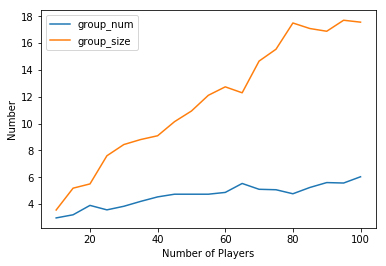

In [24]:
N = [10+5*i for i in range(19)] 
print(N)
group_num_N  = []
group_size_N = []


for n in N:
    print('N=' +str(n))
    group_num,  group_size  = Group_form_size(3,2,n,30000,30)
    group_num_N.append(group_num)
    group_size_N.append(group_size)
    


plot(N, group_num_N)
plot(N, group_size_N)
legend(['group_num','group_size']) 
xlabel("Number of Players")
ylabel("Number")

## 1.4 How trust affect group formation ?

Modify the interation with additional parameter: A <br>
A > 0 -> more trust between players<br>
A < 0 -> more suspicion between players<br>

In [9]:
def interact_trust(p1,p2,reciprocity,transistivity,Clossness_matrix, Payoff, A):
    prob   = [random.random() for i in range(2)]
    #print(str(p1)+str(p2))
    #print(prob)
    # play the prison dilema
    result = [-1,-1]
    for i in range(len(prob)):
        if prob[i] < Clossness_matrix[p1][p2]+A:
            result[i] = 1
        #else:
            #pass
    # Calculate and record the playoff
    if   sum(result) == 2: # colloborative
        #print('Colaborate!')
        Payoff[p1].append(1)
        Payoff[p2].append(1)
        Clossness_matrix[p1][p2] = 1-(1-Clossness_matrix[p1][p2])/reciprocity # reciprocity
        Clossness_matrix[p2][p1] = Clossness_matrix[p1][p2]
        # transistivity
        for i in range(len(Clossness_matrix)):
            #print(i)
            if i not in [p1,p2]:
                if abs(Clossness_matrix[p1][i]-0.5) > abs(Clossness_matrix[p2][i]-0.5): 
                    if Clossness_matrix[p1][i] > 0.5:
                        Clossness_matrix[p2][i] = 1-(1-Clossness_matrix[p2][i])/transistivity
                        Clossness_matrix[i][p2] = Clossness_matrix[p2][i]
                    elif Clossness_matrix[p1][i] < 0.5: 
                        Clossness_matrix[p2][i] = Clossness_matrix[p2][i]/transistivity
                        Clossness_matrix[i][p2] = Clossness_matrix[p2][i]
                    else:
                        pass
                        
                elif abs(Clossness_matrix[p2][i]-0.5) > abs(Clossness_matrix[p1][i]-0.5):  
                    
                    if Clossness_matrix[p2][i] > 0.5:
                        Clossness_matrix[p1][i] = 1-(1-Clossness_matrix[p1][i])/transistivity
                        Clossness_matrix[i][p1] = Clossness_matrix[p1][i]
                    elif Clossness_matrix[p2][i] < 0.5: 
                        Clossness_matrix[p1][i] = Clossness_matrix[p1][i]/transistivity
                        Clossness_matrix[i][p1] = Clossness_matrix[p1][i]
                    else:
                        pass
                else:
                    pass
            else:
                pass

        
    elif sum(result) == -2:
        #print('Defeat!')
        Payoff[p1].append(-1)
        Payoff[p2].append(-1)
        Clossness_matrix[p1][p2] = Clossness_matrix[p1][p2]/reciprocity
        Clossness_matrix[p2][p1] = Clossness_matrix[p1][p2]
        
    elif result[0] == 1 and result[1] == -1:
        #print('Nothing!')
        Payoff[p1].append(3)
        Payoff[p2].append(-3)
    else:
        #print('Nothing!')
        Payoff[p1].append(-3)
        Payoff[p2].append(3)
    
    # Update others playoff = 0 in this round
    
    for i in range(len(Clossness_matrix)):
        if i not in [p1,p2]:
            Payoff[i].append(0)
    #print(result)
    #Clossness_matrix = symm(Clossness_matrix)
    #print(Clossness_matrix)


#### Wrap up the similuation with trust into a function 

In [10]:
def Group_form_trust(rc, trans, N_people, r_num, ger_times, A):
    reciprocity   = rc
    transistivity = trans

    # How many people & rounds?
    sz = N_people
    rounds_number = r_num
    # Intialization
    C_sum = []
    #G_sum = []

    # Drawing List
    Drawing_list = arange(sz)
    start = time.time()

    # Starting rounds
    for count in range(ger_times):
        print('Counts= '+str(count))
        C_eff = []
        Clossness_matrix = zeros((sz,sz))+0.5
        fill_diagonal(Clossness_matrix,0)
        Payoff = [[] for i in range(sz)]
        rounds=0
        #print(Clossness_matrix)
        #print(Payoff)
        #print(rounds)

        while(rounds<rounds_number):
            #print(Drawing_list)
            person1 = random.choice(Drawing_list)
            person2 = random.choice(delete(Drawing_list,person1))
            #person1 = random.choice(Drawing_list)
            #person2 = random.choice(Drawing_list[0:-2])

            if person2 == person1:
                person2+=1


            if random.random() < Clossness_matrix[person1][person2]:
                #print(Clossness_matrix)
                interact_trust(person1, person2,reciprocity,transistivity,Clossness_matrix, Payoff, A)
                rounds+=1
                #print("Rounds "+str(rounds))
                #print(Clossness_matrix)
                C_eff.append(Clustering_coefficient(Clossness_matrix))
                    
            else:
                #print(Clossness_matrix)
                rounds+=1
                C_eff.append(Clustering_coefficient(Clossness_matrix))
            
            if rounds % (r_num/100) == 0:
                print('Rounds= '+str(rounds))
        C_sum.append(C_eff)
        #G_sum.append(Group_size(Clossness_matrix))


    end = time.time()
    elapsed = end - start
    print ("Time taken: ", elapsed, "seconds.")
    #plot(range(rounds_number),C_eff)
    xlim(0,r_num)
    ylim(0,1)
    k=[]
    for j in range(rounds_number):
        k.append(mean([C_sum[i][j] for i in range(len(C_sum))])) 
    #print(k)
    semilogx(range(1,rounds_number+1),k)
    xlabel("Round")
    ylabel("Clustering Coefficient")
    #print(around(Clossness_matrix))
    #summary = Group_size(Clossness_matrix)
    #print(G_sum)
    
    #return G_sum
    


### Replication of Fig. 7
reciprocity = 3, transistivity = 2, N = 50, <br>
A = -0.5 ~ 0.5, interval = 0.1<br>
round_number = 1000,000<br>
iterations = 10<br>


A= -0.5
Counts= 0
Rounds= 10000
Rounds= 20000
Rounds= 30000
Rounds= 40000
Rounds= 50000
Rounds= 60000
Rounds= 70000
Rounds= 80000
Rounds= 90000
Rounds= 100000
Rounds= 110000
Rounds= 120000
Rounds= 130000
Rounds= 140000
Rounds= 150000
Rounds= 160000
Rounds= 170000
Rounds= 180000
Rounds= 190000
Rounds= 200000
Rounds= 210000
Rounds= 220000
Rounds= 230000
Rounds= 240000
Rounds= 250000
Rounds= 260000
Rounds= 270000
Rounds= 280000
Rounds= 290000
Rounds= 300000
Rounds= 310000
Rounds= 320000
Rounds= 330000
Rounds= 340000
Rounds= 350000
Rounds= 360000
Rounds= 370000
Rounds= 380000
Rounds= 390000
Rounds= 400000
Rounds= 410000
Rounds= 420000
Rounds= 430000
Rounds= 440000
Rounds= 450000
Rounds= 460000
Rounds= 470000
Rounds= 480000
Rounds= 490000
Rounds= 500000
Rounds= 510000
Rounds= 520000
Rounds= 530000
Rounds= 540000
Rounds= 550000
Rounds= 560000
Rounds= 570000
Rounds= 580000
Rounds= 590000
Rounds= 600000
Rounds= 610000
Rounds= 620000
Rounds= 630000
Rounds= 640000
Rounds= 650000
Rounds= 660000
R

Rounds= 460000
Rounds= 470000
Rounds= 480000
Rounds= 490000
Rounds= 500000
Rounds= 510000
Rounds= 520000
Rounds= 530000
Rounds= 540000
Rounds= 550000
Rounds= 560000
Rounds= 570000
Rounds= 580000
Rounds= 590000
Rounds= 600000
Rounds= 610000
Rounds= 620000
Rounds= 630000
Rounds= 640000
Rounds= 650000
Rounds= 660000
Rounds= 670000
Rounds= 680000
Rounds= 690000
Rounds= 700000
Rounds= 710000
Rounds= 720000
Rounds= 730000
Rounds= 740000
Rounds= 750000
Rounds= 760000
Rounds= 770000
Rounds= 780000
Rounds= 790000
Rounds= 800000
Rounds= 810000
Rounds= 820000
Rounds= 830000
Rounds= 840000
Rounds= 850000
Rounds= 860000
Rounds= 870000
Rounds= 880000
Rounds= 890000
Rounds= 900000
Rounds= 910000
Rounds= 920000
Rounds= 930000
Rounds= 940000
Rounds= 950000
Rounds= 960000
Rounds= 970000
Rounds= 980000
Rounds= 990000
Rounds= 1000000
Counts= 6
Rounds= 10000
Rounds= 20000
Rounds= 30000
Rounds= 40000
Rounds= 50000
Rounds= 60000
Rounds= 70000
Rounds= 80000
Rounds= 90000
Rounds= 100000
Rounds= 110000
Rounds= 

Rounds= 890000
Rounds= 900000
Rounds= 910000
Rounds= 920000
Rounds= 930000
Rounds= 940000
Rounds= 950000
Rounds= 960000
Rounds= 970000
Rounds= 980000
Rounds= 990000
Rounds= 1000000
Counts= 1
Rounds= 10000
Rounds= 20000
Rounds= 30000
Rounds= 40000
Rounds= 50000
Rounds= 60000
Rounds= 70000
Rounds= 80000
Rounds= 90000
Rounds= 100000
Rounds= 110000
Rounds= 120000
Rounds= 130000
Rounds= 140000
Rounds= 150000
Rounds= 160000
Rounds= 170000
Rounds= 180000
Rounds= 190000
Rounds= 200000
Rounds= 210000
Rounds= 220000
Rounds= 230000
Rounds= 240000
Rounds= 250000
Rounds= 260000
Rounds= 270000
Rounds= 280000
Rounds= 290000
Rounds= 300000
Rounds= 310000
Rounds= 320000
Rounds= 330000
Rounds= 340000
Rounds= 350000
Rounds= 360000
Rounds= 370000
Rounds= 380000
Rounds= 390000
Rounds= 400000
Rounds= 410000
Rounds= 420000
Rounds= 430000
Rounds= 440000
Rounds= 450000
Rounds= 460000
Rounds= 470000
Rounds= 480000
Rounds= 490000
Rounds= 500000
Rounds= 510000
Rounds= 520000
Rounds= 530000
Rounds= 540000
Rounds= 

Rounds= 350000
Rounds= 360000
Rounds= 370000
Rounds= 380000
Rounds= 390000
Rounds= 400000
Rounds= 410000
Rounds= 420000
Rounds= 430000
Rounds= 440000
Rounds= 450000
Rounds= 460000
Rounds= 470000
Rounds= 480000
Rounds= 490000
Rounds= 500000
Rounds= 510000
Rounds= 520000
Rounds= 530000
Rounds= 540000
Rounds= 550000
Rounds= 560000
Rounds= 570000
Rounds= 580000
Rounds= 590000
Rounds= 600000
Rounds= 610000
Rounds= 620000
Rounds= 630000
Rounds= 640000
Rounds= 650000
Rounds= 660000
Rounds= 670000
Rounds= 680000
Rounds= 690000
Rounds= 700000
Rounds= 710000
Rounds= 720000
Rounds= 730000
Rounds= 740000
Rounds= 750000
Rounds= 760000
Rounds= 770000
Rounds= 780000
Rounds= 790000
Rounds= 800000
Rounds= 810000
Rounds= 820000
Rounds= 830000
Rounds= 840000
Rounds= 850000
Rounds= 860000
Rounds= 870000
Rounds= 880000
Rounds= 890000
Rounds= 900000
Rounds= 910000
Rounds= 920000
Rounds= 930000
Rounds= 940000
Rounds= 950000
Rounds= 960000
Rounds= 970000
Rounds= 980000
Rounds= 990000
Rounds= 1000000
Counts= 7

C:\Users\r0494\Anaconda3\envs\python35\lib\site-packages\matplotlib\axes\_base.py:3129: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


A= -0.3
Counts= 0
Rounds= 10000
Rounds= 20000
Rounds= 30000
Rounds= 40000
Rounds= 50000
Rounds= 60000
Rounds= 70000
Rounds= 80000
Rounds= 90000
Rounds= 100000
Rounds= 110000
Rounds= 120000
Rounds= 130000
Rounds= 140000
Rounds= 150000
Rounds= 160000
Rounds= 170000
Rounds= 180000
Rounds= 190000
Rounds= 200000
Rounds= 210000
Rounds= 220000
Rounds= 230000
Rounds= 240000
Rounds= 250000
Rounds= 260000
Rounds= 270000
Rounds= 280000
Rounds= 290000
Rounds= 300000
Rounds= 310000
Rounds= 320000
Rounds= 330000
Rounds= 340000
Rounds= 350000
Rounds= 360000
Rounds= 370000
Rounds= 380000
Rounds= 390000
Rounds= 400000
Rounds= 410000
Rounds= 420000
Rounds= 430000
Rounds= 440000
Rounds= 450000
Rounds= 460000
Rounds= 470000
Rounds= 480000
Rounds= 490000
Rounds= 500000
Rounds= 510000
Rounds= 520000
Rounds= 530000
Rounds= 540000
Rounds= 550000
Rounds= 560000
Rounds= 570000
Rounds= 580000
Rounds= 590000
Rounds= 600000
Rounds= 610000
Rounds= 620000
Rounds= 630000
Rounds= 640000
Rounds= 650000
Rounds= 660000
R

Rounds= 460000
Rounds= 470000
Rounds= 480000
Rounds= 490000
Rounds= 500000
Rounds= 510000
Rounds= 520000
Rounds= 530000
Rounds= 540000
Rounds= 550000
Rounds= 560000
Rounds= 570000
Rounds= 580000
Rounds= 590000
Rounds= 600000
Rounds= 610000
Rounds= 620000
Rounds= 630000
Rounds= 640000
Rounds= 650000
Rounds= 660000
Rounds= 670000
Rounds= 680000
Rounds= 690000
Rounds= 700000
Rounds= 710000
Rounds= 720000
Rounds= 730000
Rounds= 740000
Rounds= 750000
Rounds= 760000
Rounds= 770000
Rounds= 780000
Rounds= 790000
Rounds= 800000
Rounds= 810000
Rounds= 820000
Rounds= 830000
Rounds= 840000
Rounds= 850000
Rounds= 860000
Rounds= 870000
Rounds= 880000
Rounds= 890000
Rounds= 900000
Rounds= 910000
Rounds= 920000
Rounds= 930000
Rounds= 940000
Rounds= 950000
Rounds= 960000
Rounds= 970000
Rounds= 980000
Rounds= 990000
Rounds= 1000000
Counts= 6
Rounds= 10000
Rounds= 20000
Rounds= 30000
Rounds= 40000
Rounds= 50000
Rounds= 60000
Rounds= 70000
Rounds= 80000
Rounds= 90000
Rounds= 100000
Rounds= 110000
Rounds= 

Rounds= 890000
Rounds= 900000
Rounds= 910000
Rounds= 920000
Rounds= 930000
Rounds= 940000
Rounds= 950000
Rounds= 960000
Rounds= 970000
Rounds= 980000
Rounds= 990000
Rounds= 1000000
Counts= 1
Rounds= 10000
Rounds= 20000
Rounds= 30000
Rounds= 40000
Rounds= 50000
Rounds= 60000
Rounds= 70000
Rounds= 80000
Rounds= 90000
Rounds= 100000
Rounds= 110000
Rounds= 120000
Rounds= 130000
Rounds= 140000
Rounds= 150000
Rounds= 160000
Rounds= 170000
Rounds= 180000
Rounds= 190000
Rounds= 200000
Rounds= 210000
Rounds= 220000
Rounds= 230000
Rounds= 240000
Rounds= 250000
Rounds= 260000
Rounds= 270000
Rounds= 280000
Rounds= 290000
Rounds= 300000
Rounds= 310000
Rounds= 320000
Rounds= 330000
Rounds= 340000
Rounds= 350000
Rounds= 360000
Rounds= 370000
Rounds= 380000
Rounds= 390000
Rounds= 400000
Rounds= 410000
Rounds= 420000
Rounds= 430000
Rounds= 440000
Rounds= 450000
Rounds= 460000
Rounds= 470000
Rounds= 480000
Rounds= 490000
Rounds= 500000
Rounds= 510000
Rounds= 520000
Rounds= 530000
Rounds= 540000
Rounds= 

Rounds= 350000
Rounds= 360000
Rounds= 370000
Rounds= 380000
Rounds= 390000
Rounds= 400000
Rounds= 410000
Rounds= 420000
Rounds= 430000
Rounds= 440000
Rounds= 450000
Rounds= 460000
Rounds= 470000
Rounds= 480000
Rounds= 490000
Rounds= 500000
Rounds= 510000
Rounds= 520000
Rounds= 530000
Rounds= 540000
Rounds= 550000
Rounds= 560000
Rounds= 570000
Rounds= 580000
Rounds= 590000
Rounds= 600000
Rounds= 610000
Rounds= 620000
Rounds= 630000
Rounds= 640000
Rounds= 650000
Rounds= 660000
Rounds= 670000
Rounds= 680000
Rounds= 690000
Rounds= 700000
Rounds= 710000
Rounds= 720000
Rounds= 730000
Rounds= 740000
Rounds= 750000
Rounds= 760000
Rounds= 770000
Rounds= 780000
Rounds= 790000
Rounds= 800000
Rounds= 810000
Rounds= 820000
Rounds= 830000
Rounds= 840000
Rounds= 850000
Rounds= 860000
Rounds= 870000
Rounds= 880000
Rounds= 890000
Rounds= 900000
Rounds= 910000
Rounds= 920000
Rounds= 930000
Rounds= 940000
Rounds= 950000
Rounds= 960000
Rounds= 970000
Rounds= 980000
Rounds= 990000
Rounds= 1000000
Counts= 7

Rounds= 780000
Rounds= 790000
Rounds= 800000
Rounds= 810000
Rounds= 820000
Rounds= 830000
Rounds= 840000
Rounds= 850000
Rounds= 860000
Rounds= 870000
Rounds= 880000
Rounds= 890000
Rounds= 900000
Rounds= 910000
Rounds= 920000
Rounds= 930000
Rounds= 940000
Rounds= 950000
Rounds= 960000
Rounds= 970000
Rounds= 980000
Rounds= 990000
Rounds= 1000000
Counts= 2
Rounds= 10000
Rounds= 20000
Rounds= 30000
Rounds= 40000
Rounds= 50000
Rounds= 60000
Rounds= 70000
Rounds= 80000
Rounds= 90000
Rounds= 100000
Rounds= 110000
Rounds= 120000
Rounds= 130000
Rounds= 140000
Rounds= 150000
Rounds= 160000
Rounds= 170000
Rounds= 180000
Rounds= 190000
Rounds= 200000
Rounds= 210000
Rounds= 220000
Rounds= 230000
Rounds= 240000
Rounds= 250000
Rounds= 260000
Rounds= 270000
Rounds= 280000
Rounds= 290000
Rounds= 300000
Rounds= 310000
Rounds= 320000
Rounds= 330000
Rounds= 340000
Rounds= 350000
Rounds= 360000
Rounds= 370000
Rounds= 380000
Rounds= 390000
Rounds= 400000
Rounds= 410000
Rounds= 420000
Rounds= 430000
Rounds= 

Rounds= 240000
Rounds= 250000
Rounds= 260000
Rounds= 270000
Rounds= 280000
Rounds= 290000
Rounds= 300000
Rounds= 310000
Rounds= 320000
Rounds= 330000
Rounds= 340000
Rounds= 350000
Rounds= 360000
Rounds= 370000
Rounds= 380000
Rounds= 390000
Rounds= 400000
Rounds= 410000
Rounds= 420000
Rounds= 430000
Rounds= 440000
Rounds= 450000
Rounds= 460000
Rounds= 470000
Rounds= 480000
Rounds= 490000
Rounds= 500000
Rounds= 510000
Rounds= 520000
Rounds= 530000
Rounds= 540000
Rounds= 550000
Rounds= 560000
Rounds= 570000
Rounds= 580000
Rounds= 590000
Rounds= 600000
Rounds= 610000
Rounds= 620000
Rounds= 630000
Rounds= 640000
Rounds= 650000
Rounds= 660000
Rounds= 670000
Rounds= 680000
Rounds= 690000
Rounds= 700000
Rounds= 710000
Rounds= 720000
Rounds= 730000
Rounds= 740000
Rounds= 750000
Rounds= 760000
Rounds= 770000
Rounds= 780000
Rounds= 790000
Rounds= 800000
Rounds= 810000
Rounds= 820000
Rounds= 830000
Rounds= 840000
Rounds= 850000
Rounds= 860000
Rounds= 870000
Rounds= 880000
Rounds= 890000
Rounds= 90

Rounds= 670000
Rounds= 680000
Rounds= 690000
Rounds= 700000
Rounds= 710000
Rounds= 720000
Rounds= 730000
Rounds= 740000
Rounds= 750000
Rounds= 760000
Rounds= 770000
Rounds= 780000
Rounds= 790000
Rounds= 800000
Rounds= 810000
Rounds= 820000
Rounds= 830000
Rounds= 840000
Rounds= 850000
Rounds= 860000
Rounds= 870000
Rounds= 880000
Rounds= 890000
Rounds= 900000
Rounds= 910000
Rounds= 920000
Rounds= 930000
Rounds= 940000
Rounds= 950000
Rounds= 960000
Rounds= 970000
Rounds= 980000
Rounds= 990000
Rounds= 1000000
Counts= 3
Rounds= 10000
Rounds= 20000
Rounds= 30000
Rounds= 40000
Rounds= 50000
Rounds= 60000
Rounds= 70000
Rounds= 80000
Rounds= 90000
Rounds= 100000
Rounds= 110000
Rounds= 120000
Rounds= 130000
Rounds= 140000
Rounds= 150000
Rounds= 160000
Rounds= 170000
Rounds= 180000
Rounds= 190000
Rounds= 200000
Rounds= 210000
Rounds= 220000
Rounds= 230000
Rounds= 240000
Rounds= 250000
Rounds= 260000
Rounds= 270000
Rounds= 280000
Rounds= 290000
Rounds= 300000
Rounds= 310000
Rounds= 320000
Rounds= 

Rounds= 130000
Rounds= 140000
Rounds= 150000
Rounds= 160000
Rounds= 170000
Rounds= 180000
Rounds= 190000
Rounds= 200000
Rounds= 210000
Rounds= 220000
Rounds= 230000
Rounds= 240000
Rounds= 250000
Rounds= 260000
Rounds= 270000
Rounds= 280000
Rounds= 290000
Rounds= 300000
Rounds= 310000
Rounds= 320000
Rounds= 330000
Rounds= 340000
Rounds= 350000
Rounds= 360000
Rounds= 370000
Rounds= 380000
Rounds= 390000
Rounds= 400000
Rounds= 410000
Rounds= 420000
Rounds= 430000
Rounds= 440000
Rounds= 450000
Rounds= 460000
Rounds= 470000
Rounds= 480000
Rounds= 490000
Rounds= 500000
Rounds= 510000
Rounds= 520000
Rounds= 530000
Rounds= 540000
Rounds= 550000
Rounds= 560000
Rounds= 570000
Rounds= 580000
Rounds= 590000
Rounds= 600000
Rounds= 610000
Rounds= 620000
Rounds= 630000
Rounds= 640000
Rounds= 650000
Rounds= 660000
Rounds= 670000
Rounds= 680000
Rounds= 690000
Rounds= 700000
Rounds= 710000
Rounds= 720000
Rounds= 730000
Rounds= 740000
Rounds= 750000
Rounds= 760000
Rounds= 770000
Rounds= 780000
Rounds= 79

Rounds= 560000
Rounds= 570000
Rounds= 580000
Rounds= 590000
Rounds= 600000
Rounds= 610000
Rounds= 620000
Rounds= 630000
Rounds= 640000
Rounds= 650000
Rounds= 660000
Rounds= 670000
Rounds= 680000
Rounds= 690000
Rounds= 700000
Rounds= 710000
Rounds= 720000
Rounds= 730000
Rounds= 740000
Rounds= 750000
Rounds= 760000
Rounds= 770000
Rounds= 780000
Rounds= 790000
Rounds= 800000
Rounds= 810000
Rounds= 820000
Rounds= 830000
Rounds= 840000
Rounds= 850000
Rounds= 860000
Rounds= 870000
Rounds= 880000
Rounds= 890000
Rounds= 900000
Rounds= 910000
Rounds= 920000
Rounds= 930000
Rounds= 940000
Rounds= 950000
Rounds= 960000
Rounds= 970000
Rounds= 980000
Rounds= 990000
Rounds= 1000000
Counts= 4
Rounds= 10000
Rounds= 20000
Rounds= 30000
Rounds= 40000
Rounds= 50000
Rounds= 60000
Rounds= 70000
Rounds= 80000
Rounds= 90000
Rounds= 100000
Rounds= 110000
Rounds= 120000
Rounds= 130000
Rounds= 140000
Rounds= 150000
Rounds= 160000
Rounds= 170000
Rounds= 180000
Rounds= 190000
Rounds= 200000
Rounds= 210000
Rounds= 

Rounds= 10000
Rounds= 20000
Rounds= 30000
Rounds= 40000
Rounds= 50000
Rounds= 60000
Rounds= 70000
Rounds= 80000
Rounds= 90000
Rounds= 100000
Rounds= 110000
Rounds= 120000
Rounds= 130000
Rounds= 140000
Rounds= 150000
Rounds= 160000
Rounds= 170000
Rounds= 180000
Rounds= 190000
Rounds= 200000
Rounds= 210000
Rounds= 220000
Rounds= 230000
Rounds= 240000
Rounds= 250000
Rounds= 260000
Rounds= 270000
Rounds= 280000
Rounds= 290000
Rounds= 300000
Rounds= 310000
Rounds= 320000
Rounds= 330000
Rounds= 340000
Rounds= 350000
Rounds= 360000
Rounds= 370000
Rounds= 380000
Rounds= 390000
Rounds= 400000
Rounds= 410000
Rounds= 420000
Rounds= 430000
Rounds= 440000
Rounds= 450000
Rounds= 460000
Rounds= 470000
Rounds= 480000
Rounds= 490000
Rounds= 500000
Rounds= 510000
Rounds= 520000
Rounds= 530000
Rounds= 540000
Rounds= 550000
Rounds= 560000
Rounds= 570000
Rounds= 580000
Rounds= 590000
Rounds= 600000
Rounds= 610000
Rounds= 620000
Rounds= 630000
Rounds= 640000
Rounds= 650000
Rounds= 660000
Rounds= 670000
Roun

Rounds= 440000
Rounds= 450000
Rounds= 460000
Rounds= 470000
Rounds= 480000
Rounds= 490000
Rounds= 500000
Rounds= 510000
Rounds= 520000
Rounds= 530000
Rounds= 540000
Rounds= 550000
Rounds= 560000
Rounds= 570000
Rounds= 580000
Rounds= 590000
Rounds= 600000
Rounds= 610000
Rounds= 620000
Rounds= 630000
Rounds= 640000
Rounds= 650000
Rounds= 660000
Rounds= 670000
Rounds= 680000
Rounds= 690000
Rounds= 700000
Rounds= 710000
Rounds= 720000
Rounds= 730000
Rounds= 740000
Rounds= 750000
Rounds= 760000
Rounds= 770000
Rounds= 780000
Rounds= 790000
Rounds= 800000
Rounds= 810000
Rounds= 820000
Rounds= 830000
Rounds= 840000
Rounds= 850000
Rounds= 860000
Rounds= 870000
Rounds= 880000
Rounds= 890000
Rounds= 900000
Rounds= 910000
Rounds= 920000
Rounds= 930000
Rounds= 940000
Rounds= 950000
Rounds= 960000
Rounds= 970000
Rounds= 980000
Rounds= 990000
Rounds= 1000000
Counts= 5
Rounds= 10000
Rounds= 20000
Rounds= 30000
Rounds= 40000
Rounds= 50000
Rounds= 60000
Rounds= 70000
Rounds= 80000
Rounds= 90000
Rounds= 

Rounds= 900000
Rounds= 910000
Rounds= 920000
Rounds= 930000
Rounds= 940000
Rounds= 950000
Rounds= 960000
Rounds= 970000
Rounds= 980000
Rounds= 990000
Rounds= 1000000
Time taken:  6271.9268617630005 seconds.
A= 0.3
Counts= 0
Rounds= 10000
Rounds= 20000
Rounds= 30000
Rounds= 40000
Rounds= 50000
Rounds= 60000
Rounds= 70000
Rounds= 80000
Rounds= 90000
Rounds= 100000
Rounds= 110000
Rounds= 120000
Rounds= 130000
Rounds= 140000
Rounds= 150000
Rounds= 160000
Rounds= 170000
Rounds= 180000
Rounds= 190000
Rounds= 200000
Rounds= 210000
Rounds= 220000
Rounds= 230000
Rounds= 240000
Rounds= 250000
Rounds= 260000
Rounds= 270000
Rounds= 280000
Rounds= 290000
Rounds= 300000
Rounds= 310000
Rounds= 320000
Rounds= 330000
Rounds= 340000
Rounds= 350000
Rounds= 360000
Rounds= 370000
Rounds= 380000
Rounds= 390000
Rounds= 400000
Rounds= 410000
Rounds= 420000
Rounds= 430000
Rounds= 440000
Rounds= 450000
Rounds= 460000
Rounds= 470000
Rounds= 480000
Rounds= 490000
Rounds= 500000
Rounds= 510000
Rounds= 520000
Round

Rounds= 330000
Rounds= 340000
Rounds= 350000
Rounds= 360000
Rounds= 370000
Rounds= 380000
Rounds= 390000
Rounds= 400000
Rounds= 410000
Rounds= 420000
Rounds= 430000
Rounds= 440000
Rounds= 450000
Rounds= 460000
Rounds= 470000
Rounds= 480000
Rounds= 490000
Rounds= 500000
Rounds= 510000
Rounds= 520000
Rounds= 530000
Rounds= 540000
Rounds= 550000
Rounds= 560000
Rounds= 570000
Rounds= 580000
Rounds= 590000
Rounds= 600000
Rounds= 610000
Rounds= 620000
Rounds= 630000
Rounds= 640000
Rounds= 650000
Rounds= 660000
Rounds= 670000
Rounds= 680000
Rounds= 690000
Rounds= 700000
Rounds= 710000
Rounds= 720000
Rounds= 730000
Rounds= 740000
Rounds= 750000
Rounds= 760000
Rounds= 770000
Rounds= 780000
Rounds= 790000
Rounds= 800000
Rounds= 810000
Rounds= 820000
Rounds= 830000
Rounds= 840000
Rounds= 850000
Rounds= 860000
Rounds= 870000
Rounds= 880000
Rounds= 890000
Rounds= 900000
Rounds= 910000
Rounds= 920000
Rounds= 930000
Rounds= 940000
Rounds= 950000
Rounds= 960000
Rounds= 970000
Rounds= 980000
Rounds= 99

Rounds= 760000
Rounds= 770000
Rounds= 780000
Rounds= 790000
Rounds= 800000
Rounds= 810000
Rounds= 820000
Rounds= 830000
Rounds= 840000
Rounds= 850000
Rounds= 860000
Rounds= 870000
Rounds= 880000
Rounds= 890000
Rounds= 900000
Rounds= 910000
Rounds= 920000
Rounds= 930000
Rounds= 940000
Rounds= 950000
Rounds= 960000
Rounds= 970000
Rounds= 980000
Rounds= 990000
Rounds= 1000000
Counts= 1
Rounds= 10000
Rounds= 20000
Rounds= 30000
Rounds= 40000
Rounds= 50000
Rounds= 60000
Rounds= 70000
Rounds= 80000
Rounds= 90000
Rounds= 100000
Rounds= 110000
Rounds= 120000
Rounds= 130000
Rounds= 140000
Rounds= 150000
Rounds= 160000
Rounds= 170000
Rounds= 180000
Rounds= 190000
Rounds= 200000
Rounds= 210000
Rounds= 220000
Rounds= 230000
Rounds= 240000
Rounds= 250000
Rounds= 260000
Rounds= 270000
Rounds= 280000
Rounds= 290000
Rounds= 300000
Rounds= 310000
Rounds= 320000
Rounds= 330000
Rounds= 340000
Rounds= 350000
Rounds= 360000
Rounds= 370000
Rounds= 380000
Rounds= 390000
Rounds= 400000
Rounds= 410000
Rounds= 

Rounds= 220000
Rounds= 230000
Rounds= 240000
Rounds= 250000
Rounds= 260000
Rounds= 270000
Rounds= 280000
Rounds= 290000
Rounds= 300000
Rounds= 310000
Rounds= 320000
Rounds= 330000
Rounds= 340000
Rounds= 350000
Rounds= 360000
Rounds= 370000
Rounds= 380000
Rounds= 390000
Rounds= 400000
Rounds= 410000
Rounds= 420000
Rounds= 430000
Rounds= 440000
Rounds= 450000
Rounds= 460000
Rounds= 470000
Rounds= 480000
Rounds= 490000
Rounds= 500000
Rounds= 510000
Rounds= 520000
Rounds= 530000
Rounds= 540000
Rounds= 550000
Rounds= 560000
Rounds= 570000
Rounds= 580000
Rounds= 590000
Rounds= 600000
Rounds= 610000
Rounds= 620000
Rounds= 630000
Rounds= 640000
Rounds= 650000
Rounds= 660000
Rounds= 670000
Rounds= 680000
Rounds= 690000
Rounds= 700000
Rounds= 710000
Rounds= 720000
Rounds= 730000
Rounds= 740000
Rounds= 750000
Rounds= 760000
Rounds= 770000
Rounds= 780000
Rounds= 790000
Rounds= 800000
Rounds= 810000
Rounds= 820000
Rounds= 830000
Rounds= 840000
Rounds= 850000
Rounds= 860000
Rounds= 870000
Rounds= 88

Rounds= 650000
Rounds= 660000
Rounds= 670000
Rounds= 680000
Rounds= 690000
Rounds= 700000
Rounds= 710000
Rounds= 720000
Rounds= 730000
Rounds= 740000
Rounds= 750000
Rounds= 760000
Rounds= 770000
Rounds= 780000
Rounds= 790000
Rounds= 800000
Rounds= 810000
Rounds= 820000
Rounds= 830000
Rounds= 840000
Rounds= 850000
Rounds= 860000
Rounds= 870000
Rounds= 880000
Rounds= 890000
Rounds= 900000
Rounds= 910000
Rounds= 920000
Rounds= 930000
Rounds= 940000
Rounds= 950000
Rounds= 960000
Rounds= 970000
Rounds= 980000
Rounds= 990000
Rounds= 1000000
Counts= 2
Rounds= 10000
Rounds= 20000
Rounds= 30000
Rounds= 40000
Rounds= 50000
Rounds= 60000
Rounds= 70000
Rounds= 80000
Rounds= 90000
Rounds= 100000
Rounds= 110000
Rounds= 120000
Rounds= 130000
Rounds= 140000
Rounds= 150000
Rounds= 160000
Rounds= 170000
Rounds= 180000
Rounds= 190000
Rounds= 200000
Rounds= 210000
Rounds= 220000
Rounds= 230000
Rounds= 240000
Rounds= 250000
Rounds= 260000
Rounds= 270000
Rounds= 280000
Rounds= 290000
Rounds= 300000
Rounds= 

Rounds= 110000
Rounds= 120000
Rounds= 130000
Rounds= 140000
Rounds= 150000
Rounds= 160000
Rounds= 170000
Rounds= 180000
Rounds= 190000
Rounds= 200000
Rounds= 210000
Rounds= 220000
Rounds= 230000
Rounds= 240000
Rounds= 250000
Rounds= 260000
Rounds= 270000
Rounds= 280000
Rounds= 290000
Rounds= 300000
Rounds= 310000
Rounds= 320000
Rounds= 330000
Rounds= 340000
Rounds= 350000
Rounds= 360000
Rounds= 370000
Rounds= 380000
Rounds= 390000
Rounds= 400000
Rounds= 410000
Rounds= 420000
Rounds= 430000
Rounds= 440000
Rounds= 450000
Rounds= 460000
Rounds= 470000
Rounds= 480000
Rounds= 490000
Rounds= 500000
Rounds= 510000
Rounds= 520000
Rounds= 530000
Rounds= 540000
Rounds= 550000
Rounds= 560000
Rounds= 570000
Rounds= 580000
Rounds= 590000
Rounds= 600000
Rounds= 610000
Rounds= 620000
Rounds= 630000
Rounds= 640000
Rounds= 650000
Rounds= 660000
Rounds= 670000
Rounds= 680000
Rounds= 690000
Rounds= 700000
Rounds= 710000
Rounds= 720000
Rounds= 730000
Rounds= 740000
Rounds= 750000
Rounds= 760000
Rounds= 77

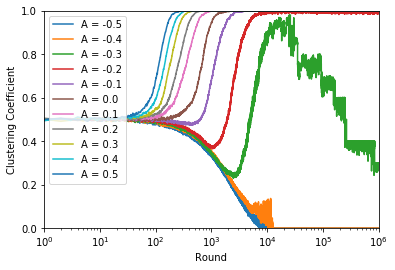

In [12]:
A = [round(-0.5+0.1*i,1) for i in range(11)]
#A = [0]
for a in A:
    print('A= '+ str(a))
    Group_form_trust(3,2,50,1000000,10,a)
    
legend(['A = '+ str(a) for a in A])
#print(A)
#print(group_size)